In [1]:
import numpy as np
import netCDF4 as nc
import sys,os

import pandas as pd
from imogen import data_info
#import iris
#import iris.plot as iplt
#import iris.quickplot as qplt

from PlotTools import plot_tools as PTs

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,16)
%matplotlib inline


In [2]:
GtC_to_ppm=0.471
ppm_to_kgC = 1e12/GtC_to_ppm


Tile_names=data_info.TILE_short_names()
Tile_colours = data_info.TILE_colours()
nTiles=len(Tile_names)


In [3]:
CONFIG= 'METHANE_FEEDBACK'  #  'BASELINE_CONFIG'  #'METHANE_FEEDBACK'  #  

DATA_DIR = '/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/'+CONFIG+'/'
PLOT_DIR = '/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/plots/'+CONFIG+'/'


os.system('mkdir '+PLOT_DIR)


256

In [4]:
ANCILS_DIR='/prj/CLIFFTOP/COMMON_DATA/ANCILS/'
GRID_file= ANCILS_DIR+'grid_info.nc'
grinf=nc.Dataset(GRID_file,'r')
lats_2d = grinf.variables['latitude'][:]
lons_2d = grinf.variables['longitude'][:]
Area_2d = grinf.variables['Area'][:]
land_index = grinf.variables['land_index'][:]
grinf.close()

AREA_file=ANCILS_DIR+'Area_in_iris_format.nc'
Ainf=nc.Dataset(AREA_file,'r')
AREA_1D = Ainf.variables['area'][:]
Ainf.close()

# soil layer thicknesses
#dz_soil= np.array([0.05,0.08408964,0.11397535,0.14142136,0.16718508,0.19168293,
#                   0.21517585,0.23784142,0.25980762,0.28117066,0.30200527,
#                   0.32237098,0.34231625,0.36188121])
#dweight_soil = dz_soil/np.sum(dz_soil)
#print(np.sum(dweight_soil))
#print(dweight_soil)

tiles= data_info.TILE_short_names


In [11]:
#GCMs = ['CEN_CSIRO-QCCCE_MOD_CSIRO-Mk3-6-0','CEN_MOHC_MOD_HadGEM2-ES','CEN_NOAA-GFDL_MOD_GFDL-ESM2G']
#GCMs  = ['CEN_BCC_MOD_bcc-csm1-1-m','CEN_BCC_MOD_bcc-csm1-1','CEN_CCCma_MOD_CanESM2','CEN_CMCC_MOD_CMCC-CMS',
#         'CEN_CSIRO-BOM_MOD_ACCESS1-0','CEN_CSIRO-BOM_MOD_ACCESS1-3','CEN_CNRM-CERFACS_MOD_CNRM-CM5',
#         'CEN_CSIRO-QCCCE_MOD_CSIRO-Mk3-6-0','CEN_INM_MOD_inmcm4','CEN_IPSL_MOD_IPSL-CM5B-LR',
#         'CEN_IPSL_MOD_IPSL-CM5A-MR','CEN_MIROC_MOD_MIROC-ESM-CHEM','CEN_MIROC_MOD_MIROC-ESM',
#         'CEN_MIROC_MOD_MIROC5','CEN_MOHC_MOD_HadGEM2-CC']
GCMs=data_info.GCMs()#[:8]

remove_gcms=['CEN_CCCma_MOD_CanESM2','CEN_CMCC_MOD_CMCC-CMS','CEN_NSF-DOE-NCAR_MOD_CESM1-CAM5',
             'CEN_NASA-GISS_MOD_GISS-E2-H','CEN_NASA-GISS_MOD_GISS-E2-H-CC']
for popGCM in remove_gcms:
    GCMs.pop(GCMs.index(popGCM))
    
#GCMs.pop(1)
#GCMs.pop(2)
nGCMs = len(GCMs)
print(GCMs)
#SCENARIOs = ['presentday','1p5equi','2equi']
SCENARIOs = ['1p5equi','2equi']
#SCENARIOs = ['2equi']
#SCENARIO_names=['Present Day','1.5$^o$C','2.0$^o$C']
SCENARIO_names=['1.5$^o$C','2.0$^o$C']
#SCENARIO_names=['2 K']
nSCENARIOs=len(SCENARIOs)
runid='EQUI'

pre_industrial_file='/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/PRE_INDUSTRIAL/vn4.8_imogen.spinup_700.dump.1850_zeroDtemp_zeroWP.nc'

['CEN_BCC_MOD_bcc-csm1-1', 'CEN_BCC_MOD_bcc-csm1-1-m', 'CEN_BNU_MOD_BNU-ESM', 'CEN_CNRM-CERFACS_MOD_CNRM-CM5', 'CEN_CSIRO-BOM_MOD_ACCESS1-0', 'CEN_CSIRO-BOM_MOD_ACCESS1-3', 'CEN_CSIRO-QCCCE_MOD_CSIRO-Mk3-6-0', 'CEN_INM_MOD_inmcm4', 'CEN_IPSL_MOD_IPSL-CM5A-LR', 'CEN_IPSL_MOD_IPSL-CM5A-MR', 'CEN_IPSL_MOD_IPSL-CM5B-LR', 'CEN_MIROC_MOD_MIROC5', 'CEN_MIROC_MOD_MIROC-ESM', 'CEN_MIROC_MOD_MIROC-ESM-CHEM', 'CEN_MOHC_MOD_HadGEM2-CC', 'CEN_MOHC_MOD_HadGEM2-ES', 'CEN_MPI-M_MOD_MPI-ESM-LR', 'CEN_MPI-M_MOD_MPI-ESM-MR', 'CEN_MRI_MOD_MRI-CGCM3', 'CEN_NASA-GISS_MOD_GISS-E2-R', 'CEN_NASA-GISS_MOD_GISS-E2-R-CC', 'CEN_NCAR_MOD_CCSM4', 'CEN_NCC_MOD_NorESM1-M', 'CEN_NCC_MOD_NorESM1-ME', 'CEN_NOAA-GFDL_MOD_GFDL-CM3', 'CEN_NOAA-GFDL_MOD_GFDL-ESM2G', 'CEN_NOAA-GFDL_MOD_GFDL-ESM2M', 'CEN_NSF-DOE-NCAR_MOD_CESM1-BGC', 'CEN_NSF-DOE-NCAR_MOD_CESM1-WACCM']


In [12]:
print(nGCMs)

29


In [28]:
dump_vars=['co2_mmr','cv','cs','frac','dtemp_o','wood_prod_fast','wood_prod_med','wood_prod_slow']
stock_vars = ['CV','CS','AtmCO2_ppm','AtmCO2_kg','frac','Woody_Products']#,'OceanCO2']
map_vars = ['CV','CS','Max_Frac']+[Tname for Tname in Tile_names ]

DATA_DICT={}
MAPDATA_DICT={ scenario:{var: [] for var in map_vars} for scenario in SCENARIOs }

for scenario in SCENARIOs:
    print('Scenario: ',scenario)
    DATA_DICT[scenario]={ var:[] for var in stock_vars  }
    for gcm in GCMs:
        print('GCM: ',gcm)
        #DUMP_FILE=DATA_DIR+gcm+'/'+runid+'_'+gcm+'_'+scenario+'.dump.21000101.0.nc'
        DUMP_FILE=DATA_DIR+gcm+'/'+runid+'_'+gcm+'_'+scenario+'.dump.nc'
        print(DUMP_FILE)
        DINF = nc.Dataset(DUMP_FILE,'r')
        
        #Ann_File=DATA_DIR+runid+'_'+gcm+'_'+scenario+'.Annual_carbon.nc'
        #print(Ann_File)
        #Ainf=nc.Dataset(Ann_File,'r')
        
        # Read in Vegetation Carbon which  is just on land points:
        CV = DINF.variables['cv'][:]
        # store mapping data
        print(CV.shape)
        MAPDATA_DICT[scenario]['CV'].append(CV)
        # Sum CV over land points
        CV = np.sum(CV*AREA_1D)
        #CV = np.sum(Ainf.variables['cv'][:].squeeze()*AREA_1D)
        #print('CV = ',CV)
        DATA_DICT[scenario]['CV'].append(CV)
        
        # Soil Carbon needs to be summed over pools and layers
        # extract and sum over pools, 1st dimension
        CS = np.sum(DINF.variables['cs'][:],axis=0)
        # sum over layers
        CS = np.sum( CS,axis=0 )
        # Store map data:
        MAPDATA_DICT[scenario]['CS'].append(CS)
        # finally sum over land points:
        CS = np.sum( CS*AREA_1D )
        #CS = np.sum(Ainf.variables['cs_gb'][:].squeeze()*AREA_1D)
        #print('CS = ', CS)
        DATA_DICT[scenario]['CS'].append(CS)
        
        WP = ( DINF.variables['wood_prod_fast'][:]+ \
               DINF.variables['wood_prod_med'][:] + \
               DINF.variables['wood_prod_slow'][:]  ) * AREA_1D
        WP = np.sum(WP)
        print('WP:',WP)
        DATA_DICT[scenario]['Woody_Products'].append(WP)
        
        #Atmospheric CO2 
        AtmCO2_ppm = DINF.variables['co2_ppmv'][0]
        AtmCO2_kg = AtmCO2_ppm*ppm_to_kgC
        #print('AtmCO2 = ',AtmCO2_kg)
        DATA_DICT[scenario]['AtmCO2_kg'].append(AtmCO2_kg)
        DATA_DICT[scenario]['AtmCO2_ppm'].append(AtmCO2_ppm)
        
        # Ocean CO2 from dtemp_o
        DTEMP_O = DINF.variables['dtemp_o'][:]
        OCEAN_CO2 = AtmCO2_ppm * np.exp(0.0423*DTEMP_O[0]) * ppm_to_kgC
        #print('OCEAN_CO2 = ',OCEAN_CO2)
        #DATA_DICT[scenario]['OceanCO2'].append(OCEAN_CO2)
        
        #Read in Frac Data
        FRAC = DINF.variables['frac'][:]
        for iTile in range(nTiles):
            MAPDATA_DICT[scenario][Tile_names[iTile]].append(FRAC[iTile,:])
        MAX_FRAC = np.argmax(FRAC,axis=0)
        MAPDATA_DICT[scenario]['Max_Frac']=MAX_FRAC
        print(MAX_FRAC.shape)
        FRAC = np.sum(FRAC*AREA_1D.squeeze()*1e-10,axis=1)  # m^2 to Mha
        DATA_DICT[scenario]['frac'].append(FRAC)
        #print(FRAC)
        
        
        DINF.close()
    print('=====================================================')
            
        


Scenario:  1p5equi
GCM:  CEN_BCC_MOD_bcc-csm1-1
/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/METHANE_FEEDBACK/CEN_BCC_MOD_bcc-csm1-1/EQUI_CEN_BCC_MOD_bcc-csm1-1_1p5equi.dump.nc
(1631,)
WP: 1.10965e+13
(1631,)
GCM:  CEN_BCC_MOD_bcc-csm1-1-m
/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/METHANE_FEEDBACK/CEN_BCC_MOD_bcc-csm1-1-m/EQUI_CEN_BCC_MOD_bcc-csm1-1-m_1p5equi.dump.nc
(1631,)
WP: 1.11145e+13
(1631,)
GCM:  CEN_BNU_MOD_BNU-ESM
/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/METHANE_FEEDBACK/CEN_BNU_MOD_BNU-ESM/EQUI_CEN_BNU_MOD_BNU-ESM_1p5equi.dump.nc
(1631,)
WP: 1.08889e+13
(1631,)
GCM:  CEN_CNRM-CERFACS_MOD_CNRM-CM5
/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/METHANE_FEEDBACK/CEN_CNRM-CERFACS_MOD_CNRM-CM5/EQUI_CEN_CNRM-CERFACS_MOD_CNRM-CM5_1p5equi.dump.nc
(1631,)
WP: 1.09252e+13
(1631,)
GCM:  CEN_CSIRO-BOM_MOD_ACCESS1-0
/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/METHANE_FEEDBACK/CEN_CSIRO-BOM_MOD_ACCESS1-0/EQUI_CEN_CSIRO-BOM_MOD_ACCESS1-0_1p5equi.dump.nc
(1631,)
WP: 1.07182e+13
(1631,)
GCM

In [14]:
print(np.array(MAPDATA_DICT['1p5equi']['CV']).shape)
print(np.array(MAPDATA_DICT['2equi']['CV']).shape)

(29, 1631)
(29, 1631)


In [29]:

PreI_DICT={}
MapPreI_DICT={}
print('GCM: ',gcm)
DUMP_FILE=pre_industrial_file
print(DUMP_FILE)
DINF = nc.Dataset(DUMP_FILE,'r')

# Read in CV, land points only:
CV = DINF.variables['cv'][:]
# store map data
MapPreI_DICT['CV']=CV
# total:
CV = np.sum(CV*AREA_1D)
print('CV = ',CV)
PreI_DICT['CV']=CV

# Read in Soil Carbon, and sum over pools:
CS = np.sum(DINF.variables['cs'][:],axis=0)
# sum over layers:
CS = np.sum( CS,axis=0 )
#store 2D map
MapPreI_DICT['CS']=CS
# global total:
CS = np.sum( CS*AREA_1D )
print('CS = ', CS)
PreI_DICT['CS']=CS

PreI_DICT['WP']=0
        
#Atmospheric CO2 
AtmCO2_ppm = DINF.variables['co2_ppmv'][0]
AtmCO2_kg = AtmCO2_ppm*ppm_to_kgC
print('AtmCO2 = ',AtmCO2_kg)
PreI_DICT['AtmCO2_kg']=AtmCO2_kg
PreI_DICT['AtmCO2_ppm']=AtmCO2_ppm
        
# Ocean CO2 from dtemp_o
DTEMP_O = DINF.variables['dtemp_o'][:]
OCEAN_CO2 = AtmCO2_ppm * np.exp(0.0423*DTEMP_O[0]) * ppm_to_kgC
print('OCEAN_CO2 = ',OCEAN_CO2)
#PreI_DICT['OceanCO2']=OCEAN_CO2


FRAC = DINF.variables['frac'][:]
for iTile in range(nTiles):
    MapPreI_DICT[Tile_names[iTile]]=FRAC[iTile,:]

MAX_FRAC = np.argmax(FRAC,axis=0)
MapPreI_DICT['Max_Frac']=MAX_FRAC
print(MAX_FRAC.shape)
print(MAX_FRAC)
FRAC = np.sum(FRAC*AREA_1D.squeeze()*1e-10,axis=1)  # m^2 to Mha
print(FRAC.shape)
PreI_DICT['frac']=FRAC
print(FRAC)
        
DINF.close()



GCM:  CEN_NSF-DOE-NCAR_MOD_CESM1-WACCM
/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/PRE_INDUSTRIAL/vn4.8_imogen.spinup_700.dump.1850_zeroDtemp_zeroWP.nc
CV =  6.91488e+14
CS =  2.08512e+15
AtmCO2 =  6.05174977815e+14
OCEAN_CO2 =  6.05174977815e+14
(1631,)
[12  4 15 ..., 15 15 15]
(17,)
[  828.55847168  2241.08251953    90.12862396   101.69768524  1730.18212891
   823.08227539   337.67059326   106.55014038   764.42907715   190.53207397
   197.43884277   173.02072144   610.69940186    19.69851303   219.19793701
  4642.71679688   140.09387207]


(array([  58.,  287.,    0.,    4.,    0.,    1.,    0.,  440.,    0.,
          35.,    0.,   51.,    0.,    6.,    0.,   20.,    9.,    0.,
           0.,    0.,    8.,    0.,  113.,    0.,    0.,    0.,    3.,
           0.,  548.,   48.]),
 array([  0.        ,   0.53333333,   1.06666667,   1.6       ,
          2.13333333,   2.66666667,   3.2       ,   3.73333333,
          4.26666667,   4.8       ,   5.33333333,   5.86666667,
          6.4       ,   6.93333333,   7.46666667,   8.        ,
          8.53333333,   9.06666667,   9.6       ,  10.13333333,
         10.66666667,  11.2       ,  11.73333333,  12.26666667,
         12.8       ,  13.33333333,  13.86666667,  14.4       ,
         14.93333333,  15.46666667,  16.        ]),
 <a list of 30 Patch objects>)

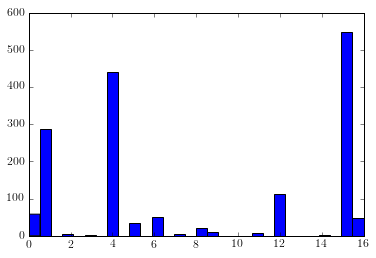

In [30]:
plt.hist(MAX_FRAC,bins=30)
#help(plt.hist)

[428.85693, 432.33636, 385.88538, 453.85876, 416.12558, 421.99283, 435.14023, 488.39014, 381.18686, 386.07883, 442.28964, 444.15814, 379.05936, 389.77399, 419.75162, 410.42221, 409.38385, 418.0614, 499.60352, 442.98474, 444.3981, 404.75262, 439.73239, 445.45447, 394.41226, 473.20032, 461.44946, 395.87473, 410.34186]
[483.96609, 488.94022, 420.92056, 521.13373, 464.93411, 473.642, 493.30991, 573.90765, 414.23782, 421.16, 503.91101, 506.75558, 411.01266, 426.47849, 470.39651, 456.45279, 455.06549, 467.93878, 591.27222, 504.78128, 506.95007, 448.29065, 499.95212, 508.47284, 433.29193, 550.68176, 532.61353, 435.31363, 456.53409]


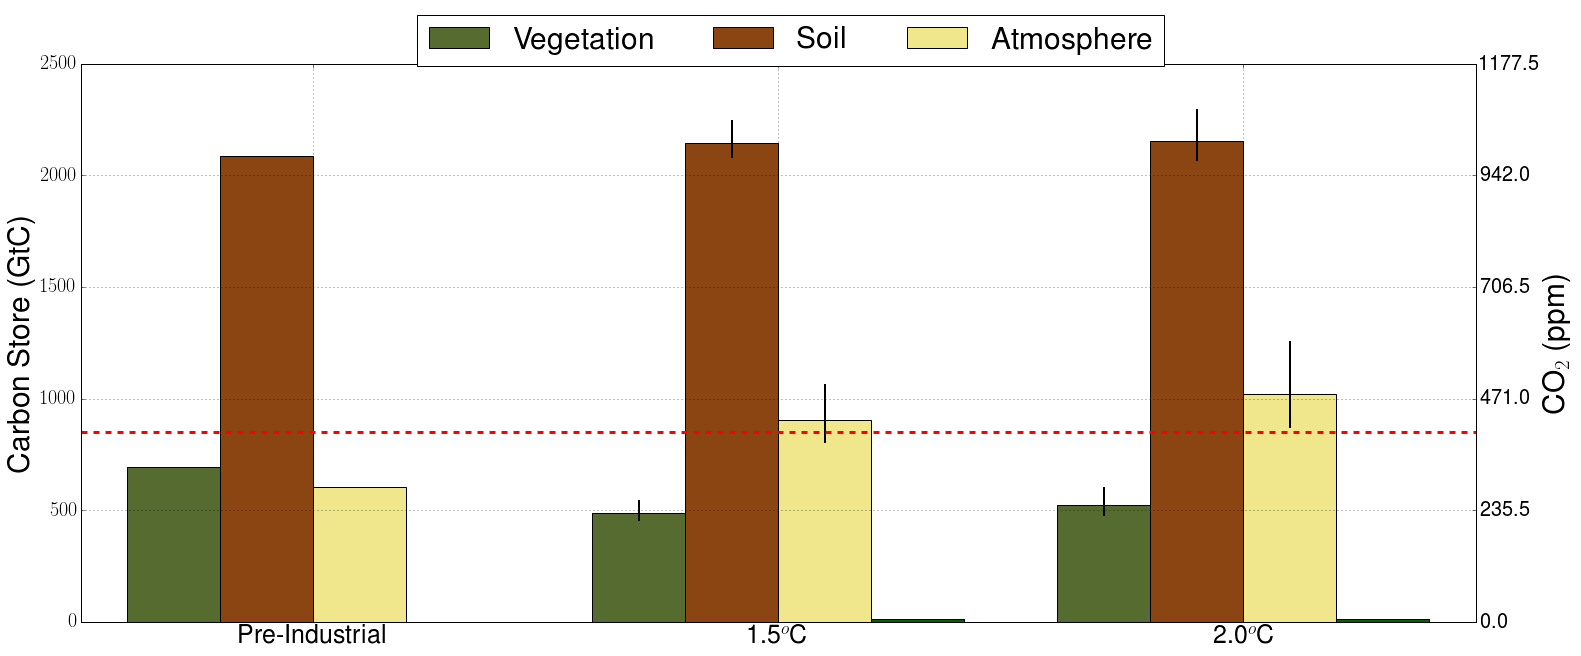

In [33]:
fig,ax=plt.subplots(ncols=1,nrows=1,figsize=[25,10])

bar_width=0.2
ax.set_xlim([0,nSCENARIOs+1.])

#Plot Pre-Industrial First
CV = np.array(PreI_DICT['CV'])*1e-12
CS = np.array(PreI_DICT['CS'])*1e-12
Land_C = CV+CS
AtmCO2 = np.array(PreI_DICT['AtmCO2_kg'])*1e-12
#OceanCO2 = np.array(DATA_DICT[scenario]['OceanCO2'])*1e-12
# Land position, iSCENARIO-0.2
iscenario=0
xpos = iscenario+0.5-0.4
cv_bar=ax.bar(xpos,np.mean(CV),color='darkolivegreen',width=bar_width)
#cs_bar=ax.bar(xpos,np.mean(CS),bottom=np.mean(CV),color='saddlebrown',width=bar_width)
ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(CV),np.max(CV)],c='k',lw=2)
xpos = iscenario+0.5-0.2
cs_bar=ax.bar(xpos,np.mean(CS),color='saddlebrown',width=bar_width)
ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(CS),np.max(CS)],c='k',lw=2)

xpos = iscenario+0.5-0.
atm_bar=ax.bar(xpos,np.mean(AtmCO2),color='khaki',width=bar_width)
ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(AtmCO2),np.max(AtmCO2)],c='k',lw=2)

#xpos = iscenario+0.5+0.2
#ocean_bar=ax.bar(xpos,np.mean(OceanCO2),color='turquoise',width=bar_width)
#ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(OceanCO2),np.max(OceanCO2)],c='k',lw=2)


for iscenario in range(nSCENARIOs):
    scenario=SCENARIOs[iscenario]
    CV = np.array(DATA_DICT[scenario]['CV'])*1e-12
    CS = np.array(DATA_DICT[scenario]['CS'])*1e-12
    WP = np.array(DATA_DICT[scenario]['Woody_Products'])*1e-12
    Land_C = CV+CS
    AtmCO2 = np.array(DATA_DICT[scenario]['AtmCO2_kg'])*1e-12
    #OceanCO2 = np.array(DATA_DICT[scenario]['OceanCO2'])*1e-12
    print(DATA_DICT[scenario]['AtmCO2_ppm'])
    
    # Land position, iSCENARIO-0.2
    xpos = iscenario+1.5-0.4
    ax.bar(xpos,np.mean(CV),color='darkolivegreen',width=bar_width)
    #cs_bar=ax.bar(xpos,np.mean(CS),bottom=np.mean(CV),color='saddlebrown',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(CV),np.max(CV)],c='k',lw=2)
    xpos = iscenario+1.5-0.2
    ax.bar(xpos,np.mean(CS),color='saddlebrown',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(CS),np.max(CS)],c='k',lw=2)
    
    xpos = iscenario+1.5+0.
    ax.bar(xpos,np.mean(AtmCO2),color='khaki',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(AtmCO2),np.max(AtmCO2)],c='k',lw=2)
    
    xpos = iscenario+1.5+0.2
    ax.bar(xpos,np.mean(WP),color='darkgreen',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(WP),np.max(WP)],c='k',lw=2)
    
    #xpos = iscenario+0.5+0.2
    #ocean_bar=ax.bar(xpos,np.mean(OceanCO2),color='turquoise',width=bar_width)
    #ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(OceanCO2),np.max(OceanCO2)],c='k',lw=2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0.5,nSCENARIOs+1,1.))
ax.set_xticklabels(['Pre-Industrial']+SCENARIO_names,fontsize=25)
ax.set_ylabel('Carbon Store (GtC)',fontsize=30)
ax.tick_params(axis='y',labelsize=20)
ax.grid(True)

# right hand labels in ppm
ax2=ax.twinx()
ax2.set_ylabel('CO$_2$ (ppm)',fontsize=30)
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks=ax.get_yticks()
ax2.set_yticklabels([label*GtC_to_ppm for label in ax.get_yticks()])
ax2.tick_params(axis='y',labelsize=20)
#Plot present day CO2 in red:
present_CO2=400/GtC_to_ppm
ax2.plot(ax2.get_xlim(),[present_CO2,present_CO2],c='r',lw=3,ls='--')


#fig.legend([cv_bar,cs_bar,atm_bar,ocean_bar],['Vegetation','Soil','Atmosphere','Ocean'],\
#          loc='upper center',ncol=4,fontsize=30)
fig.legend([cv_bar,cs_bar,atm_bar],['Vegetation','Soil','Atmosphere'],\
          loc='upper center',ncol=4,fontsize=30)
fig.savefig(PLOT_DIR+'Equilibrium_CarbonStores.png')

[428.85693, 432.33636, 385.88538, 453.85876, 416.12558, 421.99283, 435.14023, 488.39014, 381.18686, 386.07883, 442.28964, 444.15814, 379.05936, 389.77399, 419.75162, 410.42221, 409.38385, 418.0614, 499.60352, 442.98474, 444.3981, 404.75262, 439.73239, 445.45447, 394.41226, 473.20032, 461.44946, 395.87473, 410.34186]
[483.96609, 488.94022, 420.92056, 521.13373, 464.93411, 473.642, 493.30991, 573.90765, 414.23782, 421.16, 503.91101, 506.75558, 411.01266, 426.47849, 470.39651, 456.45279, 455.06549, 467.93878, 591.27222, 504.78128, 506.95007, 448.29065, 499.95212, 508.47284, 433.29193, 550.68176, 532.61353, 435.31363, 456.53409]
244.081922397


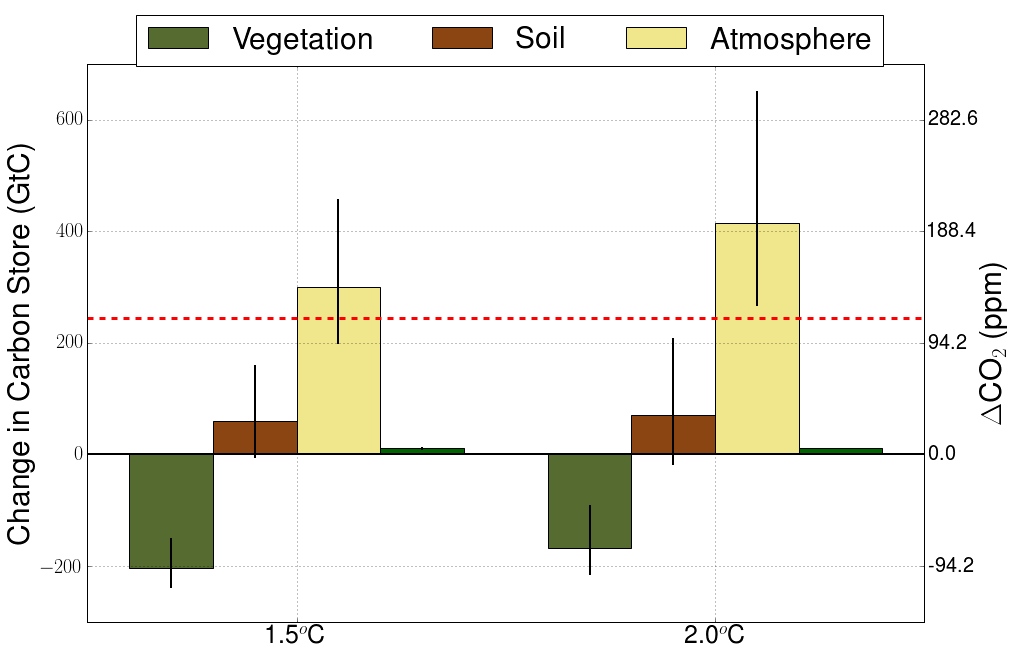

In [38]:
# plot Delta Cstores
fig,ax=plt.subplots(ncols=1,nrows=1,figsize=[15,10])

bar_width=0.2
ax.set_xlim([0,nSCENARIOs])

for iscenario in range(nSCENARIOs):
    scenario=SCENARIOs[iscenario]
    CV = np.array(DATA_DICT[scenario]['CV']-PreI_DICT['CV'])*1e-12
    CS = np.array(DATA_DICT[scenario]['CS']-PreI_DICT['CS'])*1e-12
    WP = np.array(DATA_DICT[scenario]['Woody_Products'])*1e-12
    Land_C = CV+CS
    AtmCO2 = np.array(DATA_DICT[scenario]['AtmCO2_kg']-PreI_DICT['AtmCO2_kg'])*1e-12
    #OceanCO2 = np.array(DATA_DICT[scenario]['OceanCO2'])*1e-12
    print(DATA_DICT[scenario]['AtmCO2_ppm'])
    
    # Land position, iSCENARIO-0.2
    xpos = iscenario+0.5-0.4
    ax.bar(xpos,np.mean(CV),color='darkolivegreen',width=bar_width)
    #cs_bar=ax.bar(xpos,np.mean(CS),bottom=np.mean(CV),color='saddlebrown',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(CV),np.max(CV)],c='k',lw=2)
    xpos = iscenario+0.5-0.2
    ax.bar(xpos,np.mean(CS),color='saddlebrown',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(CS),np.max(CS)],c='k',lw=2)
    
    xpos = iscenario+0.5+0.
    ax.bar(xpos,np.mean(AtmCO2),color='khaki',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(AtmCO2),np.max(AtmCO2)],c='k',lw=2)
    
    xpos = iscenario+0.5+0.2
    ax.bar(xpos,np.mean(WP),color='darkgreen',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(WP),np.max(WP)],c='k',lw=2)
    
    #xpos = iscenario+0.5+0.2
    #ocean_bar=ax.bar(xpos,np.mean(OceanCO2),color='turquoise',width=bar_width)
    #ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(OceanCO2),np.max(OceanCO2)],c='k',lw=2)
    
ax.plot(ax.get_xlim(),[0,0],c='k',lw=2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.tick_params(labelright=True)
ax.set_xticks(np.arange(0.5,nSCENARIOs,1.))
ax.set_xticklabels(SCENARIO_names,fontsize=25)
ax.set_ylabel('Change in Carbon Store (GtC)',fontsize=30)
ax.tick_params(axis='y',labelsize=20)
ax.grid(True)

# right hand labels in ppm
ax2=ax.twinx()
ax2.set_ylabel('$\Delta$CO$_2$ (ppm)',fontsize=30)
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks=ax.get_yticks()
ax2.set_yticklabels([label*GtC_to_ppm for label in ax.get_yticks()])
ax2.tick_params(axis='y',labelsize=20)
#Plot present day CO2 in red:
present_CO2=(400/GtC_to_ppm)-(PreI_DICT['AtmCO2_kg']*1e-12)
print(present_CO2)
ax2.plot(ax2.get_xlim(),[present_CO2,present_CO2],c='r',lw=3,ls='--')


#fig.legend([cv_bar,cs_bar,atm_bar,ocean_bar],['Vegetation','Soil','Atmosphere','Ocean'],\
#          loc='upper center',ncol=4,fontsize=30)
fig.legend([cv_bar,cs_bar,atm_bar],['Vegetation','Soil','Atmosphere'],\
          loc=9,ncol=4,fontsize=30)  #'upper center'

fig.savefig(PLOT_DIR+'Equilibrium_DeltaCarbonStores.png')

In [19]:
labels=ax.get_yticks()
label=labels[0]
print(label)


-400.0


In [20]:
Tile_Dict = { scenario:{tile:[] for tile in Tile_names} for scenario in SCENARIOs }

for scenario in SCENARIOs:
    for iTile in range(nTiles):
        for i_gcm in range(nGCMs):
            Tile_Dict[scenario][Tile_names[iTile]].append(DATA_DICT[scenario]['frac'][i_gcm][iTile])
        Tile_Dict[scenario][Tile_names[iTile]] = np.array(Tile_Dict[scenario][Tile_names[iTile]])



In [21]:
#PreI_DICT['frac']

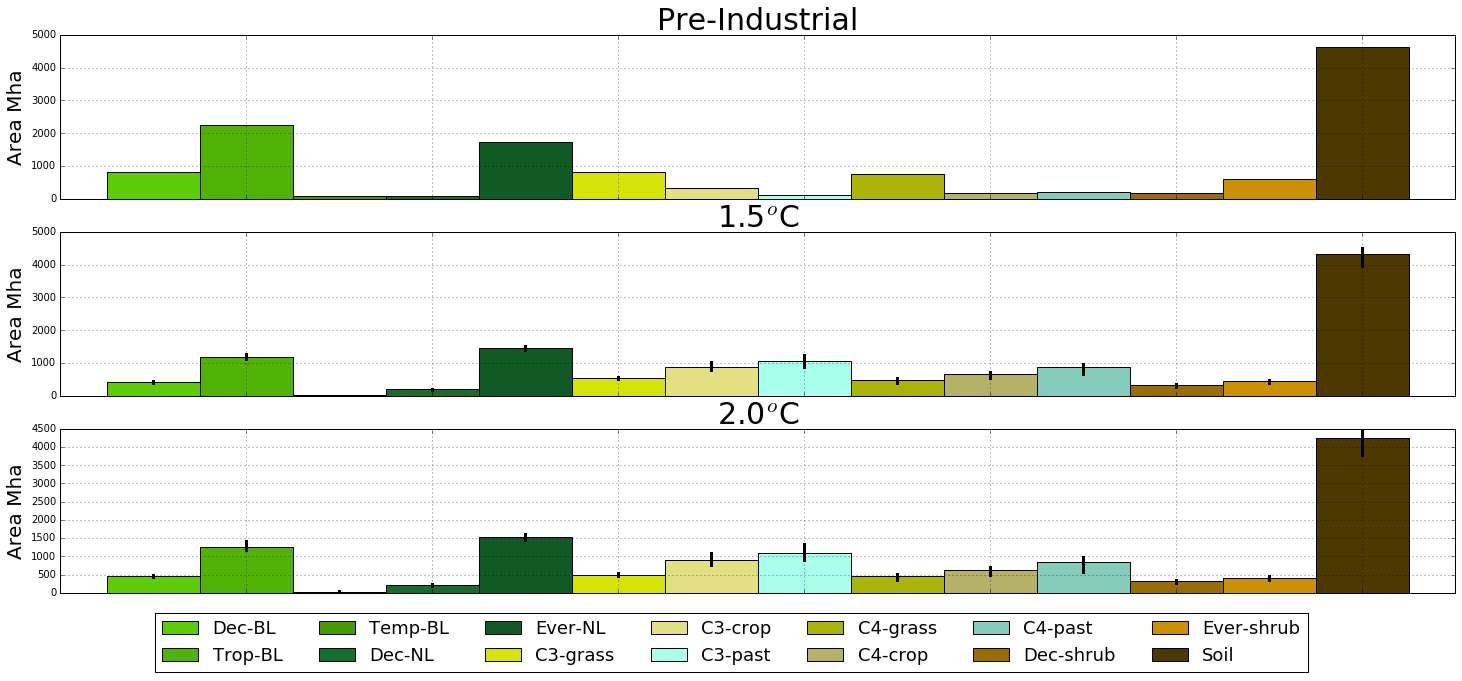

In [22]:
fig,axes=plt.subplots(ncols=1,nrows=1+nSCENARIOs,figsize=[25,10])

plotTiles_locs = list(range(13))+[15]
nPLOTtiles=len(plotTiles_locs)

bar_width=1.
#OceanCO2 = np.array(DATA_DICT[scenario]['OceanCO2'])*1e-12
# Land position, iSCENARIO-0.2
ax=axes[0]
for iTilea in range(nPLOTtiles):  # Tiles):
    xpos=iTilea+0.5
    iTile=plotTiles_locs[iTilea]
    ax.bar(xpos,PreI_DICT['frac'][iTile],color=Tile_colours[iTile],width=bar_width,label=Tile_names[iTile])
ax.set_ylabel('Area Mha',fontsize=20)
ax.set_xticklabels(['' for i in range(nPLOTtiles)])
ax.set_xlim([0,nPLOTtiles+1])
ax.set_title('Pre-Industrial',fontsize=30)
ax.grid(True)

for iscenario in range(nSCENARIOs):
    ax=axes[iscenario+1]
    scenario=SCENARIOs[iscenario]
    for iTilea in range(nPLOTtiles):  # Tiles):
        xpos=iTilea+0.5
        iTile=plotTiles_locs[iTilea]
        tile=Tile_names[iTile]
        ax.bar(xpos,np.mean(Tile_Dict[scenario][tile]),color=Tile_colours[iTile],width=bar_width)
        ax.plot([xpos+0.5,xpos+0.5],[np.min(Tile_Dict[scenario][tile]),np.max(Tile_Dict[scenario][tile])],lw=3,c='k')
    ax.set_ylabel('Area Mha',fontsize=20)
    #ax.set_xticklabels(['' for i in range(nTiles)])
    ax.set_xticklabels(['' for i in range(nPLOTtiles)])
    ax.set_xlim([0,nPLOTtiles+1])
    ax.set_title(SCENARIO_names[iscenario],fontsize=30)
    ax.grid(True)

handles,labels = axes[0].get_legend_handles_labels()
fig.legend(handles,labels,ncol=int(np.ceil(nPLOTtiles/2.)),loc=8,fontsize=18)

fig.savefig(PLOT_DIR+'Equilibrium_CoverFractions.png')

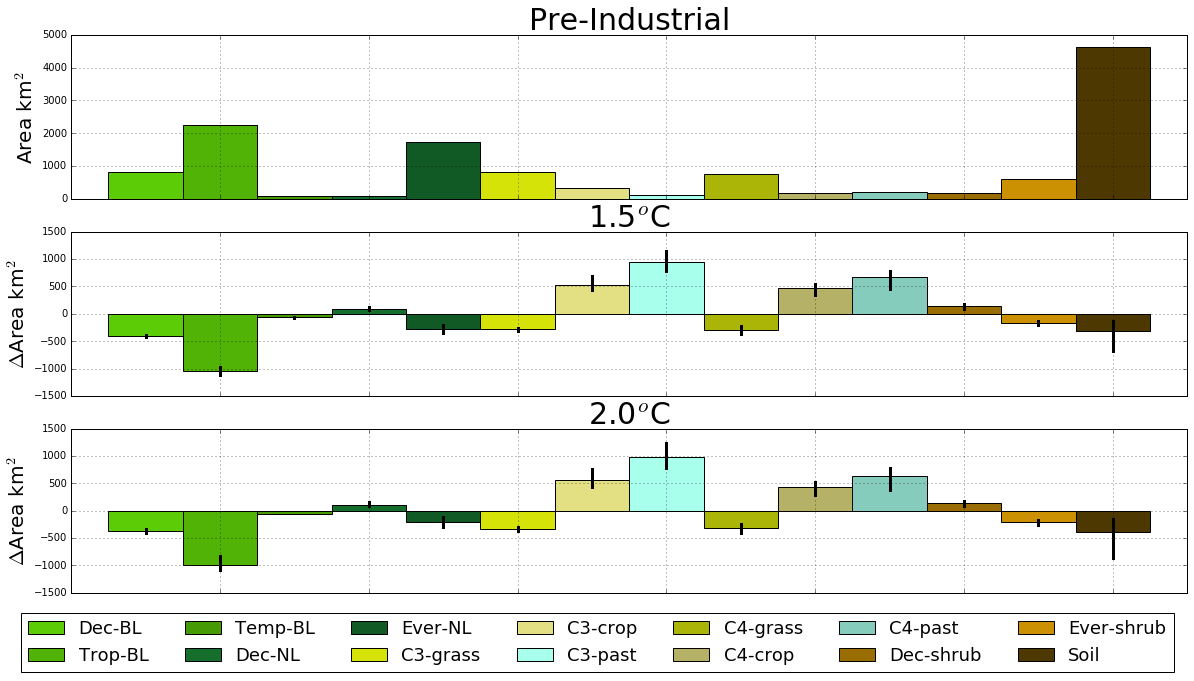

In [23]:
fig,axes=plt.subplots(ncols=1,nrows=1+nSCENARIOs,figsize=[20,10])

plotTiles_locs = list(range(13))+[15]
nPLOTtiles=len(plotTiles_locs)

bar_width=1.
#OceanCO2 = np.array(DATA_DICT[scenario]['OceanCO2'])*1e-12
# Land position, iSCENARIO-0.2
ax=axes[0]
for iTilea in range(nPLOTtiles):  # Tiles):
    xpos=iTilea+0.5
    iTile=plotTiles_locs[iTilea]
    ax.bar(xpos,PreI_DICT['frac'][iTile],color=Tile_colours[iTile],width=bar_width,label=Tile_names[iTile])
ax.set_ylabel('Area km$^2$',fontsize=20)
ax.set_xticklabels(['' for i in range(nPLOTtiles)])
ax.set_xlim([0,nPLOTtiles+1])
ax.set_title('Pre-Industrial',fontsize=30)
ax.grid(True)

for iscenario in range(nSCENARIOs):
    ax=axes[iscenario+1]
    scenario=SCENARIOs[iscenario]
    for iTilea in range(nPLOTtiles):  # Tiles):
        xpos=iTilea+0.5
        iTile=plotTiles_locs[iTilea]
        tile=Tile_names[iTile]
        DIFF_DATA=Tile_Dict[scenario][tile]-PreI_DICT['frac'][iTile]
        ax.bar(xpos,np.mean(DIFF_DATA),color=Tile_colours[iTile],width=bar_width)
        ax.plot([xpos+0.5,xpos+0.5],[np.min(DIFF_DATA),np.max(DIFF_DATA)],lw=3,c='k')
               
    ax.set_ylabel('$\Delta$Area km$^2$',fontsize=20)
    #ax.set_xticklabels(['' for i in range(nTiles)])
    ax.set_xticklabels(['' for i in range(nPLOTtiles)])
    ax.set_xlim([0,nPLOTtiles+1])
    ax.set_ylim([-1500,1500])
    ax.set_title(SCENARIO_names[iscenario],fontsize=30)
    ax.grid(True)

handles,labels = axes[0].get_legend_handles_labels()
fig.legend(handles,labels,ncol=int(np.ceil(nPLOTtiles/2.)),loc=8,fontsize=18)
    
fig.savefig(PLOT_DIR+'Equilibrium_DeltaCoverFractions.png')

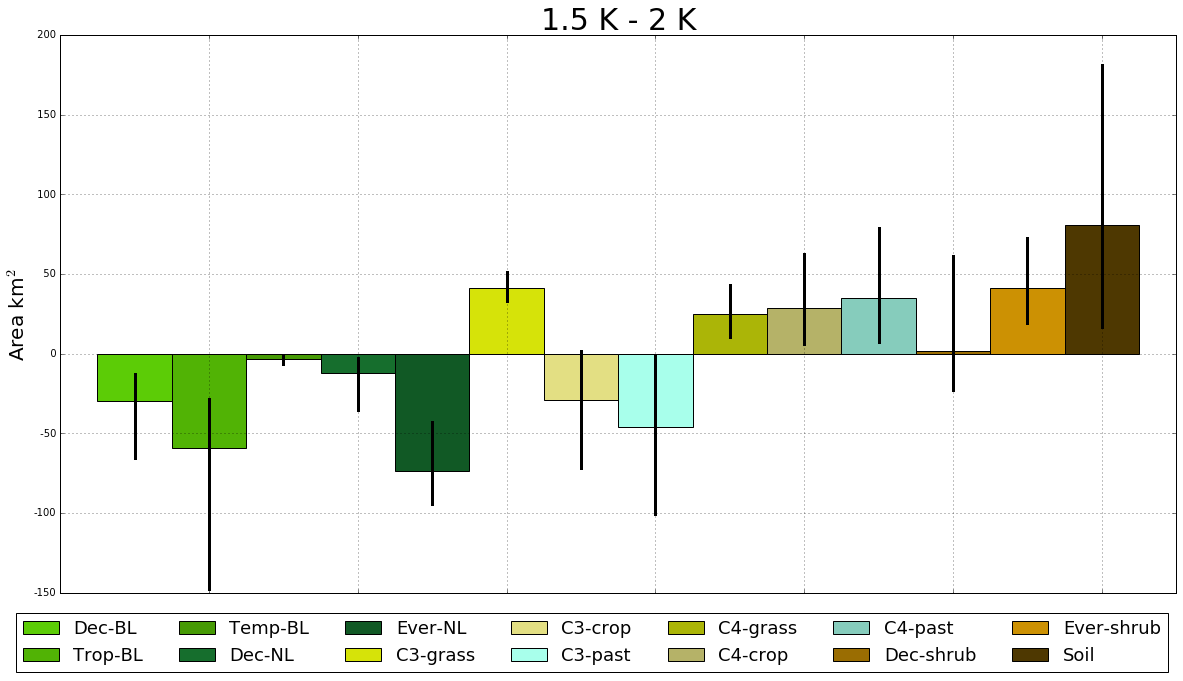

In [24]:
fig,axes=plt.subplots(ncols=1,nrows=1,figsize=[20,10])

plotTiles_locs = list(range(13))+[15]
nPLOTtiles=len(plotTiles_locs)

bar_width=1.
#OceanCO2 = np.array(DATA_DICT[scenario]['OceanCO2'])*1e-12
# Land position, iSCENARIO-0.2
ax=axes
for iTilea in range(nPLOTtiles):  # Tiles):
    xpos=iTilea+0.5
    iTile=plotTiles_locs[iTilea]
    tile=Tile_names[iTile]
    DIFF_DATA=Tile_Dict['1p5equi'][tile]-Tile_Dict['2equi'][tile]
    ax.bar(xpos,np.mean(DIFF_DATA),color=Tile_colours[iTile],width=bar_width,label=Tile_names[iTile])
    ax.plot([xpos+0.5,xpos+0.5],[np.min(DIFF_DATA),np.max(DIFF_DATA)],lw=3,c='k')
ax.set_ylabel('Area km$^2$',fontsize=20)
ax.set_xticklabels(['' for i in range(nPLOTtiles)])
ax.set_xlim([0,nPLOTtiles+1])
ax.set_yticklabels([str('%4i'%label) for label in ax.get_yticks()])
ax.set_title('1.5 K - 2 K',fontsize=30)
ax.grid(True)

handles,labels = axes.get_legend_handles_labels()
fig.legend(handles,labels,ncol=int(np.ceil(nPLOTtiles/2.)),loc=8,fontsize=18)


1.5$^o$C


/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in true_divide


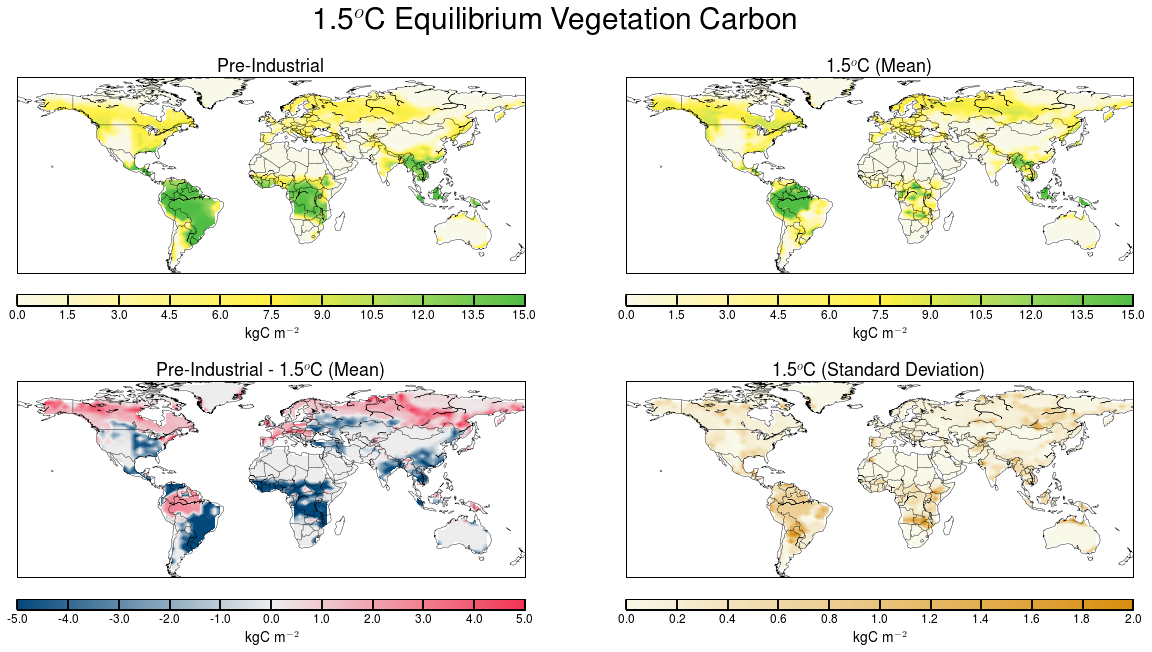

2.0$^o$C


/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in true_divide


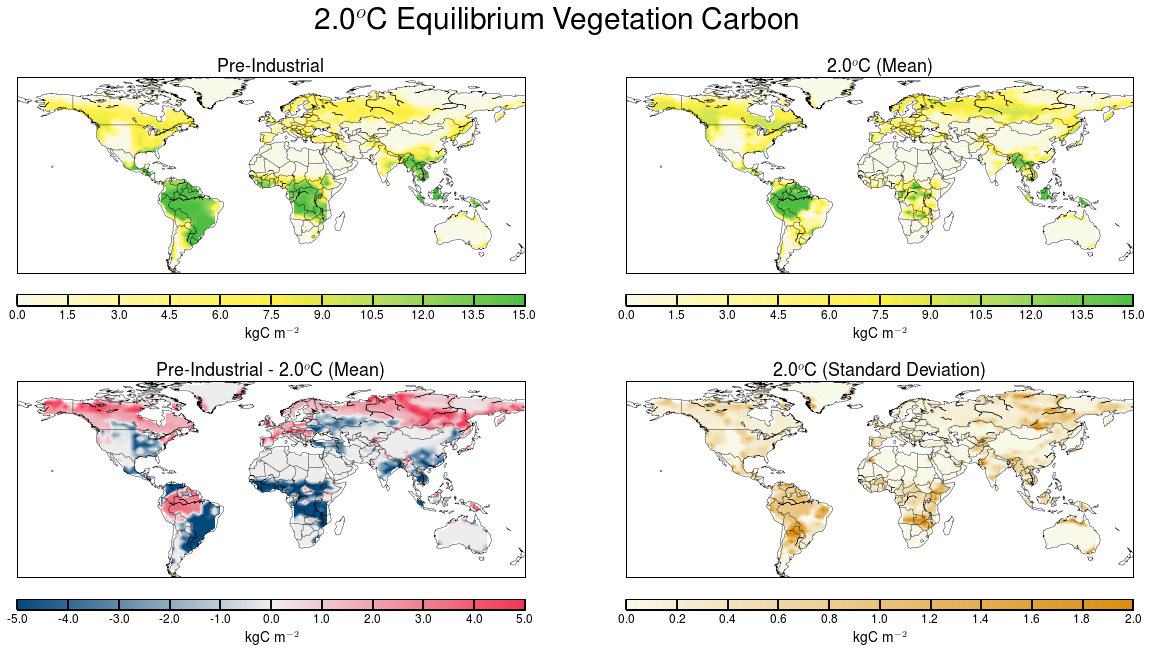

In [25]:
# plot maps of CV, and the change in CV:
variable='CV'
long_name='Vegetation Carbon'
map_unit='kgC m$^{-2}$'
Abs_range=[0,15]
#Abs_Colours=['#eeeeee','#fff68f','#e5d83c','#a8da61','#4fbd44']
Abs_Colours=['#f9f9ea','#fff68f','#fff043','#a8da61','#4fbd44']
Diff_range=[-5,5]
Diff_Colours=['#03487b','#eeeeee','#f23452']
#Dev_range=[0,100]
Dev_range=[0,2]
Dev_Colours=['#f9f9ea','#d98d0e']



PreI_map_Data=MapPreI_DICT[variable]
PreI_plotdata=np.ma.masked_array(PreI_map_Data[land_index],mask=land_index.mask)
#print(PreI_map_Data.shape)
#print(PreI_plotdata)
for iscenario in range(nSCENARIOs):
    scenario  = SCENARIOs[iscenario]
    scen_name = SCENARIO_names[iscenario]
    print(scen_name)
    
    FIG,AXES=plt.subplots(ncols=2,nrows=2,figsize=[20,10])
    
    # Plot Preindustrial
    PTs.plot_map(PreI_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Abs_range,
                 COLOURS=Abs_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                 PLOT_TITLE='Pre-Industrial',AXIS=AXES[0,0],
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18]
                )
    
    SCEN_mean_map_DATA=np.mean(np.array(MAPDATA_DICT[scenario][variable]),axis=0)
    SCEN_mean_plotdata=np.ma.masked_array(SCEN_mean_map_DATA[land_index],mask=land_index.mask)
    #print(SCEN_mean_map_DATA.shape)
    PTs.plot_map(SCEN_mean_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Abs_range,
                 COLOURS=Abs_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',
                 PLOT_TITLE=scen_name+' (Mean)',AXIS=AXES[0,1],
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18]
                 )
    
    SCEN_DIFF_DATA = np.array(MAPDATA_DICT[scenario][variable])-PreI_map_Data
    #print(SCEN_DIFF_DATA.shape)
    SCEN_mean_diff_map = np.mean(SCEN_DIFF_DATA,axis=0)
    SCEN_diff_plotdata=np.ma.masked_array(SCEN_mean_diff_map[land_index],mask=land_index.mask)
    #print(SCEN_mean_diff_map.shape)
    PTs.plot_map(SCEN_diff_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Diff_range,
                 COLOURS=Diff_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',
                 PLOT_TITLE='Pre-Industrial - '+scen_name+' (Mean)',AXIS=AXES[1,0],
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18]
                 )
    
    SCEN_std_map = np.std(MAPDATA_DICT[scenario][variable],axis=0)
    SCEN_perc_dev_map = (SCEN_std_map/SCEN_mean_map_DATA)*100.
    #SCEN_std_plotdata=np.ma.masked_array(SCEN_perc_dev_map[land_index],mask=land_index.mask)
    SCEN_std_plotdata=np.ma.masked_array(SCEN_std_map[land_index],mask=land_index.mask)
    #print(SCEN_mean_diff_map.shape)
    PTs.plot_map(SCEN_std_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Dev_range,
                 COLOURS=Dev_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',
                 PLOT_TITLE=scen_name+'  (Standard Deviation)',AXIS=AXES[1,1],
                 #CBAR_LABEL='\% of Mean',FONTSIZES=[12,12,14,18],
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18],
                 )
    
    FIG.suptitle(scen_name+' Equilibrium '+long_name,fontsize=30)
    #PTs.plot_map_multi( [PreI_plotdata,SCEN_mean_plotdata,SCEN_diff_plotdata,SCEN_std_plotdata],
    #                    [lons_2d for i in range(4)],[lats_2d for i in range(4)],
    #                   PLOT_TITLES=['Pre-Industrial',scen_name,'Mean Difference','Standard Deviation'],
    #                  Ncols=2, Nrows=2,lDISPLAY=True)
    
    FIG.savefig(PLOT_DIR+'Map_'+variable+'_'+scenario+'.png')
    plt.show()
    
    

1.5$^o$C
2.0$^o$C


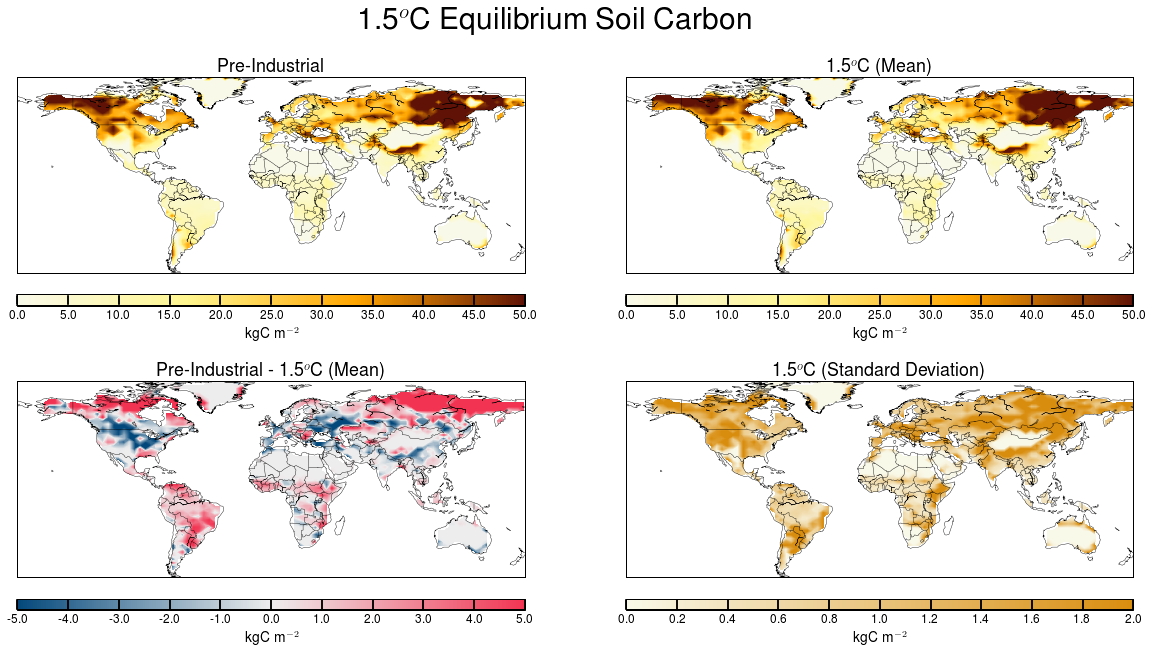

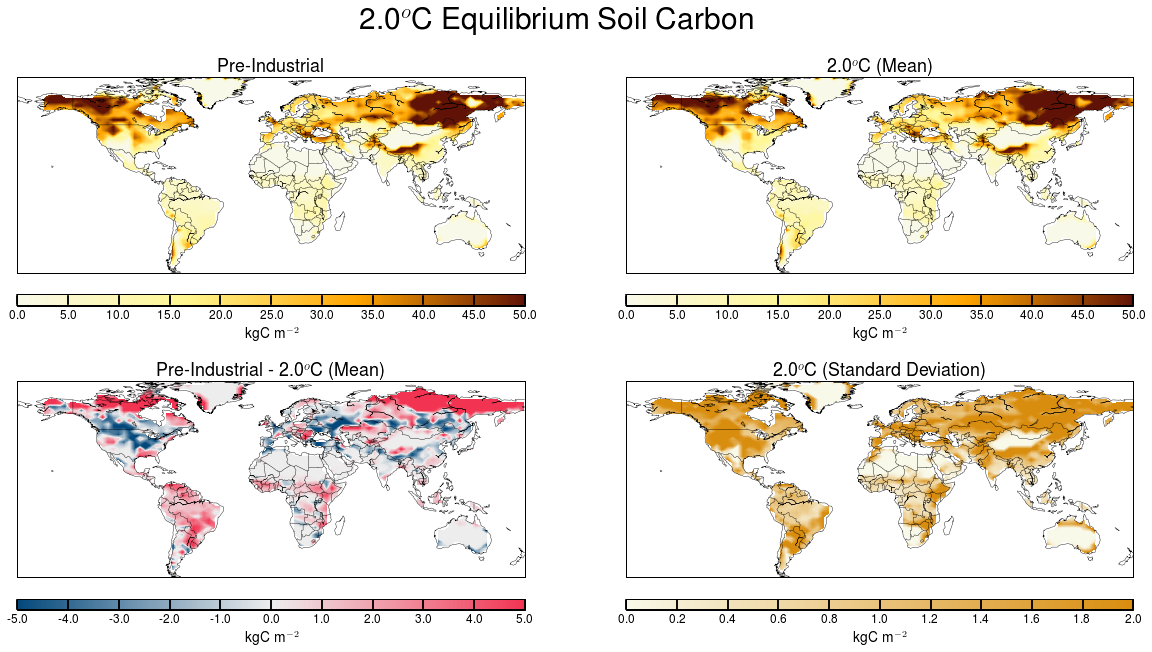

In [26]:
# plot maps of CV, and the change in CV:
variable='CS'
long_name='Soil Carbon'
map_unit='kgC m$^{-2}$'
Abs_range=[0,50]
#Abs_Colours=['#eeeeee','#fff68f','#ffa500','#5f1205']
Abs_Colours=['#f9f9ea','#fff68f','#ffa500','#5f1205']
Diff_range=[-5,5]
Diff_Colours=['#03487b','#eeeeee','#f23452']
#Dev_range=[0,100]
#Dev_Colours=['#eeeeee','#f23452']
Dev_range=[0,2]
Dev_Colours=['#f9f9ea','#d98d0e']



#del PreI_plotdata
PreI_map_Data=np.copy(MapPreI_DICT[variable])
PreI_plotdata=np.ma.masked_array(PreI_map_Data[land_index],mask=land_index.mask)
#print(PreI_plotdata2)

for iscenario in range(nSCENARIOs):
    scenario  = SCENARIOs[iscenario]
    scen_name = SCENARIO_names[iscenario]
    print(scen_name)
    
    FIG,AXES=plt.subplots(ncols=2,nrows=2,figsize=[20,10])
    
    # Plot Preindustrial
    PTs.plot_map(PreI_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Abs_range,
                 COLOURS=Abs_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                 PLOT_TITLE='Pre-Industrial',AXIS=AXES[0,0],
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18]
                )
    
    SCEN_mean_map_DATA=np.mean(np.array(MAPDATA_DICT[scenario][variable]),axis=0)
    SCEN_mean_plotdata=np.ma.masked_array(SCEN_mean_map_DATA[land_index],mask=land_index.mask)
    #print(SCEN_mean_map_DATA.shape)
    PTs.plot_map(SCEN_mean_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Abs_range,
                 COLOURS=Abs_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',
                 PLOT_TITLE=scen_name+' (Mean)',AXIS=AXES[0,1],
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18]
                 )
    
    SCEN_DIFF_DATA = np.array(MAPDATA_DICT[scenario][variable])-PreI_map_Data
    #print(SCEN_DIFF_DATA.shape)
    SCEN_mean_diff_map = np.mean(SCEN_DIFF_DATA,axis=0)
    SCEN_diff_plotdata=np.ma.masked_array(SCEN_mean_diff_map[land_index],mask=land_index.mask)
    #print(SCEN_mean_diff_map.shape)
    PTs.plot_map(SCEN_diff_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Diff_range,
                 COLOURS=Diff_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',
                 PLOT_TITLE='Pre-Industrial - '+scen_name+' (Mean)',AXIS=AXES[1,0],
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18]
                 )
    
    SCEN_std_map = np.std(MAPDATA_DICT[scenario][variable],axis=0)
    SCEN_perc_dev_map = (SCEN_std_map/SCEN_mean_map_DATA)*100.
    #SCEN_std_plotdata=np.ma.masked_array(SCEN_perc_dev_map[land_index],mask=land_index.mask)
    SCEN_std_plotdata=np.ma.masked_array(SCEN_std_map[land_index],mask=land_index.mask)
    #print(SCEN_mean_diff_map.shape)
    PTs.plot_map(SCEN_std_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Dev_range,
                 COLOURS=Dev_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',
                 PLOT_TITLE=scen_name+'  (Standard Deviation)',AXIS=AXES[1,1],
                 #CBAR_LABEL='\% of Mean',FONTSIZES=[12,12,14,18]
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18]
                 )
    
    FIG.suptitle(scen_name+' Equilibrium '+long_name,fontsize=30)

    FIG.savefig(PLOT_DIR+'Map_'+variable+'_'+scenario+'.png')    
    
    


In [ ]:
#Plot Max Frac data:

FIG,AXES=plt.subplots(ncols=1,nrows=3,figsize=[15,15])

plotdata=np.ma.masked_array(MapPreI_DICT['Max_Frac'][land_index],mask=land_index.mask)
PTs.plot_map(plotdata,lons_2d,lats_2d,
             COLOURS=Tile_colours,DATA_RANGE=[0,nTiles+0.1],
             TickLEVELS=list(np.arange(0.5,nTiles+1,1)),TickLABELS=Tile_names,
             CBAR_TICK_LENGTH=0,CLEVELS=range(nTiles+1),CBAR_ORIENTATION='vertical',
             PLOT_TITLE='Pre-Industrial',FONTSIZES=[12,12,14,18],
             RESOLUTION='c',
             AXIS=AXES[0],
            )


scenario='1p5equi'
scen_name='1.5$^o$C'
plotdata=np.ma.masked_array(MAPDATA_DICT[scenario]['Max_Frac'][land_index],mask=land_index.mask)
PTs.plot_map(plotdata,lons_2d,lats_2d,
             COLOURS=Tile_colours,DATA_RANGE=[0,nTiles+0.1],
             TickLEVELS=list(np.arange(0.5,nTiles+1,1)),TickLABELS=Tile_names,
             CBAR_TICK_LENGTH=0,CLEVELS=range(nTiles+1),CBAR_ORIENTATION='vertical',
             PLOT_TITLE=scen_name,FONTSIZES=[12,12,14,18],
             RESOLUTION='c',
             AXIS=AXES[1],
            )

scenario='2equi'
scen_name='2.0$^o$C'
plotdata=np.ma.masked_array(MAPDATA_DICT[scenario]['Max_Frac'][land_index],mask=land_index.mask)
PTs.plot_map(plotdata,lons_2d,lats_2d,
             COLOURS=Tile_colours,DATA_RANGE=[0,nTiles+0.1],
             TickLEVELS=list(np.arange(0.5,nTiles+1,1)),TickLABELS=Tile_names,
             CBAR_TICK_LENGTH=0,CLEVELS=range(nTiles+1),CBAR_ORIENTATION='vertical',
             PLOT_TITLE=scen_name,FONTSIZES=[12,12,14,18],
             RESOLUTION='c',
             AXIS=AXES[2],
            )

FIG.suptitle('Maximum Gridcell Land-Cover',fontsize=30)
FIG.savefig(PLOT_DIR+'Map_MaxLandCover.png')   


In [ ]:

print(plotdata)
plt.imshow(MAX_FRAC[land_index],origin='bottom',vmin=0,vmax=13)
plt.colorbar()

In [ ]:
np.array(MAPDATA_DICT['1p5equi']['CS']).shape

In [ ]:
AXES.shape

In [ ]:
help(PTs.plot_map)